<a href="https://colab.research.google.com/github/AnTruongRyerson/CIND820/blob/main/Copy_of_An_Truong_CMTH_642_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
df_red.info()
df_white.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [11]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
#1. Join the red and white wine datasets by adding the rows of one to the other. Assign the joined data to a data frame and name it wine_data_all (4 points)
wine_all_data = df_red.append(df_white, ignore_index=True)
wine_all_data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 2. Check the datatypes of the attributes. (3 points)
wine_all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [ ]:
# 3. Are there any missing values in the dataset? (4 points)
wine_all_data.isnull().sum()
#There is no missing values.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

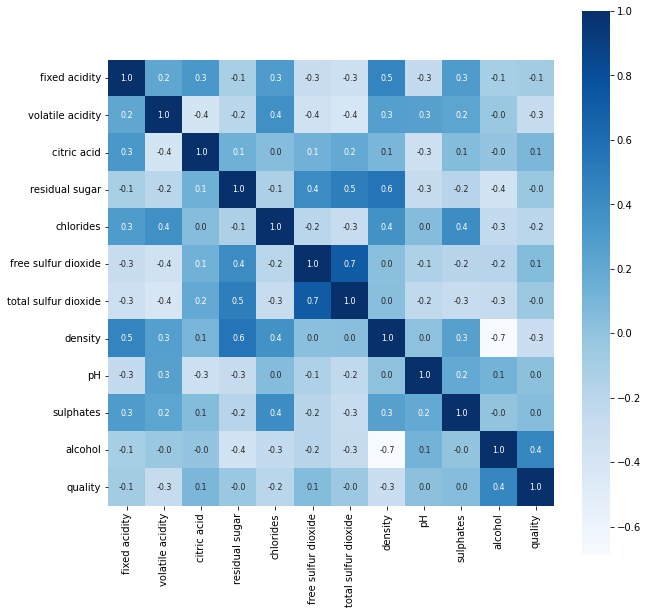

In [ ]:
# 4. What is the correlation between the attributes other than Quality? (10 points)
correlation = wine_all_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

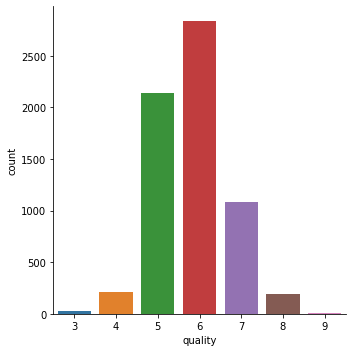

In [ ]:
# 5. Graph the frequency distribution of wine quality by using Quality. (10 points)
sns.catplot(x='quality', data = wine_all_data, kind = 'count')

In [ ]:
# 6. Reduce the levels of rating for quality to 3 levels as high, medium, and low. Assign the levels of 3, 4 to level 0; and 5, 6 to level 2: 7, 8 and 9 to level 2. (10 points)
quality = wine_all_data["quality"].values
rating = []
for num in quality:
    if num<5:
        rating.append("0")
    elif num>6:
        rating.append("2")
    else:
        rating.append("1")

In [ ]:
#Create new data
rating = pd.DataFrame(data=rating, columns=["rating"])
data = pd.concat([wine_all_data,rating],axis=1)
data.drop(columns="quality",axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  rating                6497 non-null   object 
dtypes: float64(11), object(1)
memory usage: 609.2+ KB


In [ ]:
# 7. Normalize the numeric attributes. (10 points) 
# creating X-->input feature vector and y-->output feature vector

X = data.drop(['rating'], axis = 1)
y = data['rating']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [ ]:
from sklearn import preprocessing
import numpy as np
x_array = np.array([5,20,50])
normalized_arr = preprocessing.normalize([x_array])
print(normalized_arr)

[[0.09245003 0.36980013 0.92450033]]


In [ ]:
# 8. Divide the dataset to training and test sets. (12 points)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ("Train set:", X_train.shape, y_train.shape)
print ("Test set:", X_test.shape, y_test.shape)

Train set: (4547, 11) (4547,)
Test set: (1950, 11) (1950,)


In [ ]:
# 9. Use the KNN algorithm to predict the quality of wine using its attributes. (12 points)
#Train Model and Predict
k = 3
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=3 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=3 is 0.798974358974359


Minimum error:- 0.19179487179487179 at K = 10


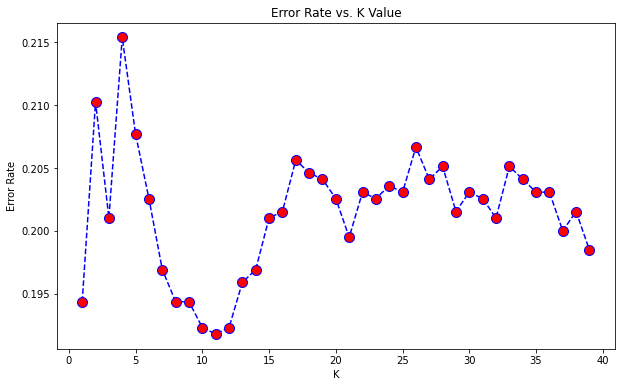

In [ ]:
#Improve the model and find out the optimal k value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8082051282051282 at K = 10


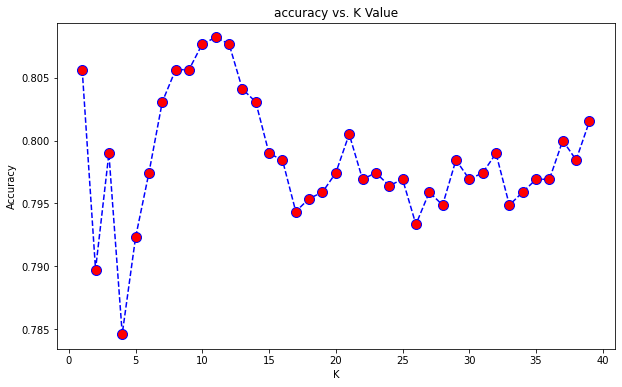

In [ ]:
#Visualize the plot between accuracy and K value
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [ ]:
k = 10
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=10 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=10 is 0.8076923076923077


In [ ]:
# 10. Display the confusion matrix to evaluate the model performance. (12 points)

In [ ]:
print("\n Train Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_train, knn.predict(X_train)))


 Train Data: KNN_Confusion Matrix:
 
[[   0  174    4]
 [   0 3323  158]
 [   0  563  325]]


In [ ]:
print("\n Test Data: KNN_Confusion Matrix:\n ")
print(confusion_matrix(y_test, knn.predict(X_test)))


 Test Data: KNN_Confusion Matrix:
 
[[   0   66    2]
 [   0 1431   62]
 [   0  257  132]]


In [ ]:
# 11. Evaluate the model performance by computing Accuracy, Precision and Recall. (15 points)

print("\n Train Data: KNN_Classification Report:\n ")
print(classification_report(y_train, knn.predict(X_train), target_names=['Class 0', 'Class 1', 'Class 2']))

print("\n Test Data: KNN_Classification Report:\n ")
print(classification_report(y_test, knn.predict(X_test), target_names=['Class 0', 'Class 1', 'Class 2']))

print(f"Overall Accuracy Score of Training Data is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Overall Accuracy Score of Testing Data is {accuracy_score(y_test, knn.predict(X_test))}")


 Train Data: KNN_Classification Report:
 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00       178
     Class 1       0.82      0.95      0.88      3481
     Class 2       0.67      0.37      0.47       888

    accuracy                           0.80      4547
   macro avg       0.50      0.44      0.45      4547
weighted avg       0.76      0.80      0.77      4547


 Test Data: KNN_Classification Report:
 


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        68
     Class 1       0.82      0.96      0.88      1493
     Class 2       0.67      0.34      0.45       389

    accuracy                           0.80      1950
   macro avg       0.50      0.43      0.44      1950
weighted avg       0.76      0.80      0.76      1950

Overall Accuracy Score of Training Data is 0.8022872223444029
Overall Accuracy Score of Testing Data is 0.8015384615384615
